# EDA

In [1]:
# ============================================================================
# LOAD CLEANED DATASETS (use this in your EDA notebook)
# ============================================================================

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Get project root
project_root = Path.cwd().parent.parent
output_dir = project_root / "data" / "outputs"

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Loading cleaned datasets from Parquet...")

# Load all cleaned datasets (Parquet preserves dtypes!)
df_sessions_clean = pd.read_parquet(output_dir / 'sessions_clean.parquet')
df_participants_clean = pd.read_parquet(output_dir / 'participants_clean.parquet')
df_brainstorming_clean = pd.read_parquet(output_dir / 'brainstorming_clean.parquet')
df_questionnaires_clean = pd.read_parquet(output_dir / 'questionnaires_clean.parquet')

print("✅ All datasets loaded!")
print(f"\nDataset shapes:")
print(f"  Sessions:       {df_sessions_clean.shape}")
print(f"  Participants:   {df_participants_clean.shape}")
print(f"  Brainstorming:  {df_brainstorming_clean.shape}")
print(f"  Questionnaires: {df_questionnaires_clean.shape}")

# Verify datetime is still datetime (not string!)
print(f"\nDatetime verification:")
print(f"  session_created_at: {df_sessions_clean['session_created_at'].dtype}")
print(f"  completed_at (brainstorm): {df_brainstorming_clean['completed_at'].dtype}")

Loading cleaned datasets from Parquet...
✅ All datasets loaded!

Dataset shapes:
  Sessions:       (142, 6)
  Participants:   (142, 13)
  Brainstorming:  (142, 13)
  Questionnaires: (140, 14)

Datetime verification:
  session_created_at: datetime64[ns, UTC]
  completed_at (brainstorm): datetime64[ns, UTC]


In [2]:
# %%
# Verify List Columns Are Properly Loaded
print("\n" + "="*60)
print("LIST COLUMNS VERIFICATION")
print("="*60)

# Check each dataframe's list columns
print("\n1. Participants DataFrame:")
print(f"   brainstorming_modalities type: {type(df_participants_clean['brainstorming_modalities'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_participants_clean['brainstorming_modalities'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n2. Brainstorming DataFrame:")
print(f"   used_ideas type: {type(df_brainstorming_clean['used_ideas'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_brainstorming_clean['used_ideas'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n3. Questionnaires DataFrame:")
print(f"   ai_benefits type: {type(df_questionnaires_clean['ai_benefits'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_questionnaires_clean['ai_benefits'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print(f"\n   difficulties type: {type(df_questionnaires_clean['difficulties'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_questionnaires_clean['difficulties'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n" + "="*60)
print("✅ If all show 'list' type, Parquet preserved the data correctly!")
print("❌ If any show 'str' type, we need to convert them")
print("="*60)


LIST COLUMNS VERIFICATION

1. Participants DataFrame:
   brainstorming_modalities type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['inPerson'] (type: ndarray)
     Row 1: ['inPerson'] (type: ndarray)
     Row 2: ['remote'] (type: ndarray)

2. Brainstorming DataFrame:
   used_ideas type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: [1 2 3 4 5] (type: ndarray)
     Row 1: [1 2 3 4 5] (type: ndarray)
     Row 2: [1 2 3 4 5] (type: ndarray)

3. Questionnaires DataFrame:
   ai_benefits type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['stimulatingNewIdeas' 'timeSaving'] (type: ndarray)
     Row 1: ['timeSaving' 'stimulatingNewIdeas' 'betterThoughtOrganization'
 'helpReformulation'] (type: ndarray)
     Row 2: ['timeSaving' 'stimulatingNewIdeas'] (type: ndarray)

   difficulties type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['noDifficulty'] (type: ndarray)
     Row 1: ['noDifficulty'] (type: ndarray)
     Row 2: ['lackInspiration'] (type: ndarra

## **Section 1: Who Are Your Users?**

### 1.1: Demographics Summary Table

In [3]:
# Create demographics summary
print("="*60)
print("PARTICIPANT DEMOGRAPHICS SUMMARY")
print("="*60)

demographics_summary = pd.DataFrame({
    'Metric': [
        'Total Participants',
        'Group A',
        'Group B',
        'English Speakers',
        'French Speakers',
        'AI Regular Users',
        'AI Occasional Users',
        'AI Never Users',
        'Avg AI Comfort (1-5)',
        'Avg Creativity Level (1-5)',
        'Many Brainstorming Experience',
        'Few Brainstorming Experience'
    ],
    'Count / Value': [
        len(df_participants_clean),
        len(df_participants_clean[df_sessions_clean['group_assigned'] == 'A']),
        len(df_participants_clean[df_sessions_clean['group_assigned'] == 'B']),
        (df_participants_clean['language'] == 'en').sum(),
        (df_participants_clean['language'] == 'fr').sum(),
        (df_participants_clean['ai_tools_usage'] == 'regularly').sum(),
        (df_participants_clean['ai_tools_usage'] == 'occasionally').sum(),
        (df_participants_clean['ai_tools_usage'] == 'never').sum(),
        df_participants_clean['ai_comfort_level'].mean().round(2),
        df_participants_clean['creativity_level'].mean().round(2),
        (df_participants_clean['brainstorming_experience'] == 'many').sum(),
        (df_participants_clean['brainstorming_experience'] == 'few').sum()
    ]
})

print(demographics_summary.to_string(index=False))
print("="*60)

PARTICIPANT DEMOGRAPHICS SUMMARY
                       Metric  Count / Value
           Total Participants         142.00
                      Group A          71.00
                      Group B          71.00
             English Speakers          23.00
              French Speakers         119.00
             AI Regular Users          92.00
          AI Occasional Users          48.00
               AI Never Users           2.00
         Avg AI Comfort (1-5)           3.76
   Avg Creativity Level (1-5)           3.63
Many Brainstorming Experience          67.00
 Few Brainstorming Experience          58.00


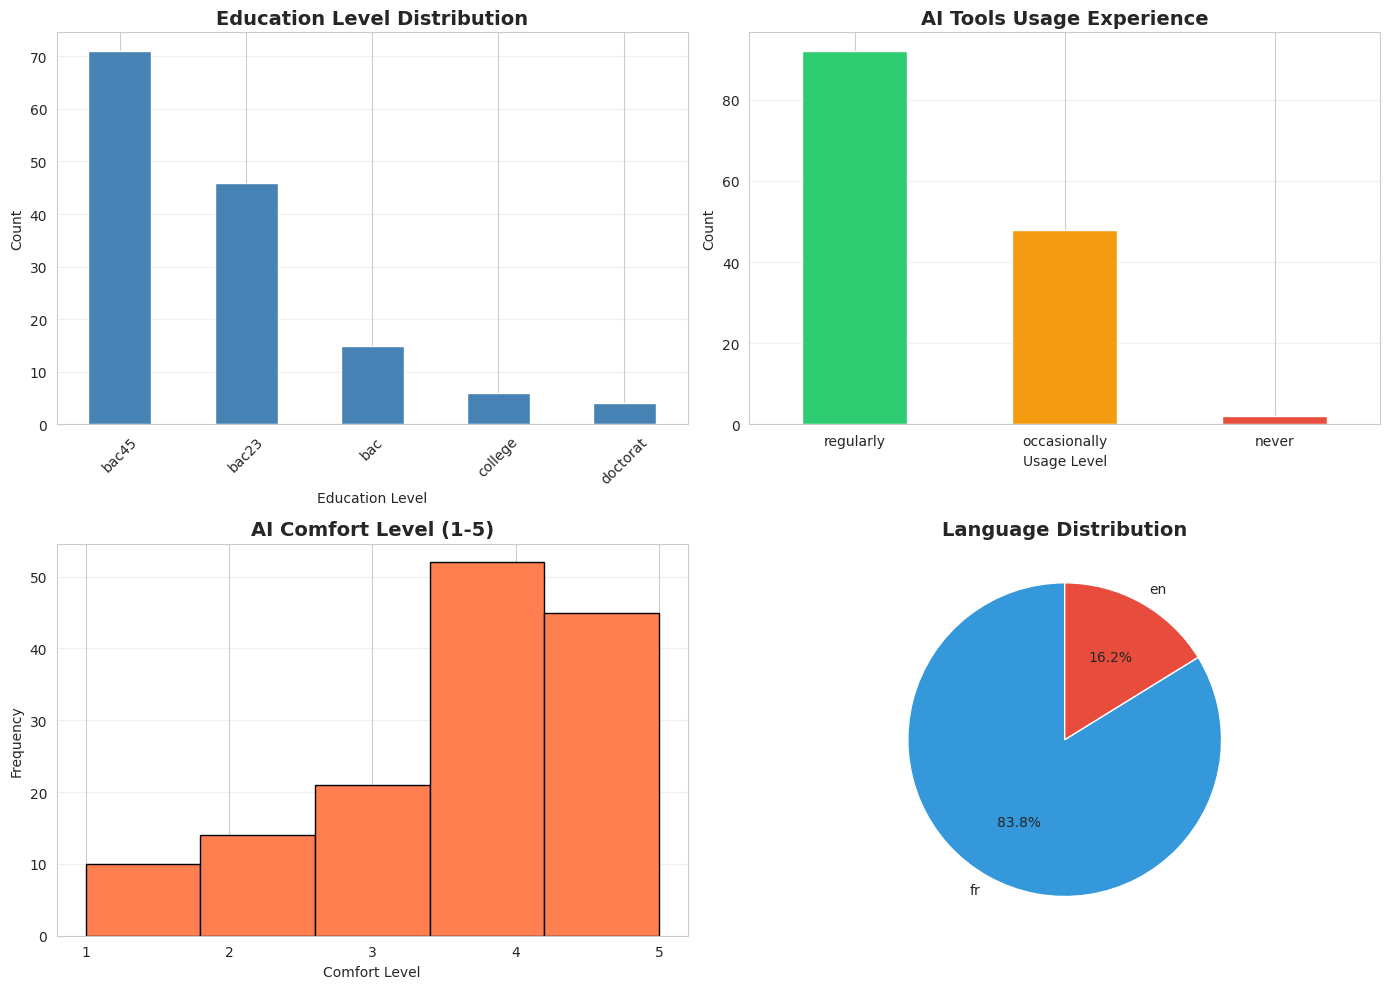

✅ Demographics visualizations created!


In [4]:
# %%
# 1. Education Level Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Education Levels
education_counts = df_participants_clean['education_level'].value_counts()
ax1 = axes[0, 0]
education_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Education Level Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: AI Tools Usage
ai_usage_counts = df_participants_clean['ai_tools_usage'].value_counts()
ax2 = axes[0, 1]
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ai_usage_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('AI Tools Usage Experience', fontsize=14, fontweight='bold')
ax2.set_xlabel('Usage Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: AI Comfort Level Distribution
ax3 = axes[1, 0]
df_participants_clean['ai_comfort_level'].hist(bins=5, ax=ax3, color='coral', edgecolor='black')
ax3.set_title('AI Comfort Level (1-5)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Comfort Level')
ax3.set_ylabel('Frequency')
ax3.set_xticks([1, 2, 3, 4, 5])
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Language Distribution
language_counts = df_participants_clean['language'].value_counts()
ax4 = axes[1, 1]
ax4.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', 
        colors=['#3498db', '#e74c3c'], startangle=90)
ax4.set_title('Language Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Demographics visualizations created!")

✅ **Highly educated sample:** 50% have Master's degree (bac+5)  
✅ **AI-savvy users:** 65% regular AI users, only 2 never used it  
✅ **Confident with AI:** Most rated 4-5 on comfort scale  
✅ **French-dominant:** 84% French speakers

### 1.2: Group A vs B Comparison (Critical!)

In [5]:
# %%
# Group A vs B Demographic Comparison
print("="*60)
print("GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK")
print("="*60)

# Merge participants with sessions to get group assignment
df_demo = df_participants_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id', 
    how='left'
)

df_demo.head()

GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK


,participant_id,session_id,language,education_level,ai_tools_usage,ai_comfort_level,creativity_level,ai_creative_process,ai_tool_specification,brainstorming_experience,brainstorming_modalities,consent_confirmation,instructions_understood,group_assigned
0,673b723b78a95d45ec47c311,362a42fb-cf47-4ebf-abf6-7c1131f94e11,en,bac23,never,1,3,no,None,few,[inPerson],True,True,B
1,5ede918b4280d611f9a38200,187aea78-1f2b-4720-98f7-3915ddb659be,fr,doctorat,regularly,5,3,yes,Support à la créativité,many,[inPerson],True,True,B
2,58bfee7de5869400018f5e9e,9249cc22-ee1a-440e-85d0-3f018afbe082,en,bac45,regularly,4,4,no,None,few,[remote],True,True,B
3,68262995c77dd8cc9b293aa6,0c82ca88-3e43-49ed-859f-fd24173e7fe6,fr,bac45,occasionally,3,4,yes,ChatGPT pour resoudre un probleme statistique,few,[inPerson],True,True,A
4,5d164f9b1a4be700176367bd,421a5ad2-0867-460b-891b-200786b51f60,fr,bac23,regularly,4,3,no,None,many,[remote],True,True,B


In [6]:
print("="*60)
print("GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK")
print("="*60)

# Create comparison table
comparison = pd.DataFrame({
    'Metric': [
        'Sample Size',
        'English (%)',
        'French (%)',
        'Avg Education Level',
        'AI Regular Users (%)',
        'AI Occasional Users (%)',
        'AI Never Users (%)',
        'Avg AI Comfort (1-5)',
        'Avg Creativity (1-5)',
        'Many Brainstorm Exp (%)'
    ],
    'Group A': [
        (df_demo['group_assigned'] == 'A').sum(),
        ((df_demo['group_assigned'] == 'A') & (df_demo['language'] == 'en')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['language'] == 'fr')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        'Mixed',
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'regularly')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'occasionally')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'never')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        df_demo[df_demo['group_assigned'] == 'A']['ai_comfort_level'].mean().round(2),
        df_demo[df_demo['group_assigned'] == 'A']['creativity_level'].mean().round(2),
        ((df_demo['group_assigned'] == 'A') & (df_demo['brainstorming_experience'] == 'many')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100
    ],
    'Group B': [
        (df_demo['group_assigned'] == 'B').sum(),
        ((df_demo['group_assigned'] == 'B') & (df_demo['language'] == 'en')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['language'] == 'fr')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        'Mixed',
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'regularly')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'occasionally')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'never')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        df_demo[df_demo['group_assigned'] == 'B']['ai_comfort_level'].mean().round(2),
        df_demo[df_demo['group_assigned'] == 'B']['creativity_level'].mean().round(2),
        ((df_demo['group_assigned'] == 'B') & (df_demo['brainstorming_experience'] == 'many')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100
    ]
})

# Round percentage columns
comparison['Group A'] = comparison['Group A'].apply(lambda x: f"{x:.1f}%" if isinstance(x, float) and x > 1 else x)
comparison['Group B'] = comparison['Group B'].apply(lambda x: f"{x:.1f}%" if isinstance(x, float) and x > 1 else x)

print(comparison.to_string(index=False))
print("="*60)

GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK
                 Metric Group A Group B
            Sample Size      71      71
            English (%)   16.9%   15.5%
             French (%)   83.1%   84.5%
    Avg Education Level   Mixed   Mixed
   AI Regular Users (%)   64.8%   64.8%
AI Occasional Users (%)   33.8%   33.8%
     AI Never Users (%)    1.4%    1.4%
   Avg AI Comfort (1-5)    3.8%    3.8%
   Avg Creativity (1-5)    3.7%    3.5%
Many Brainstorm Exp (%)   45.1%   49.3%


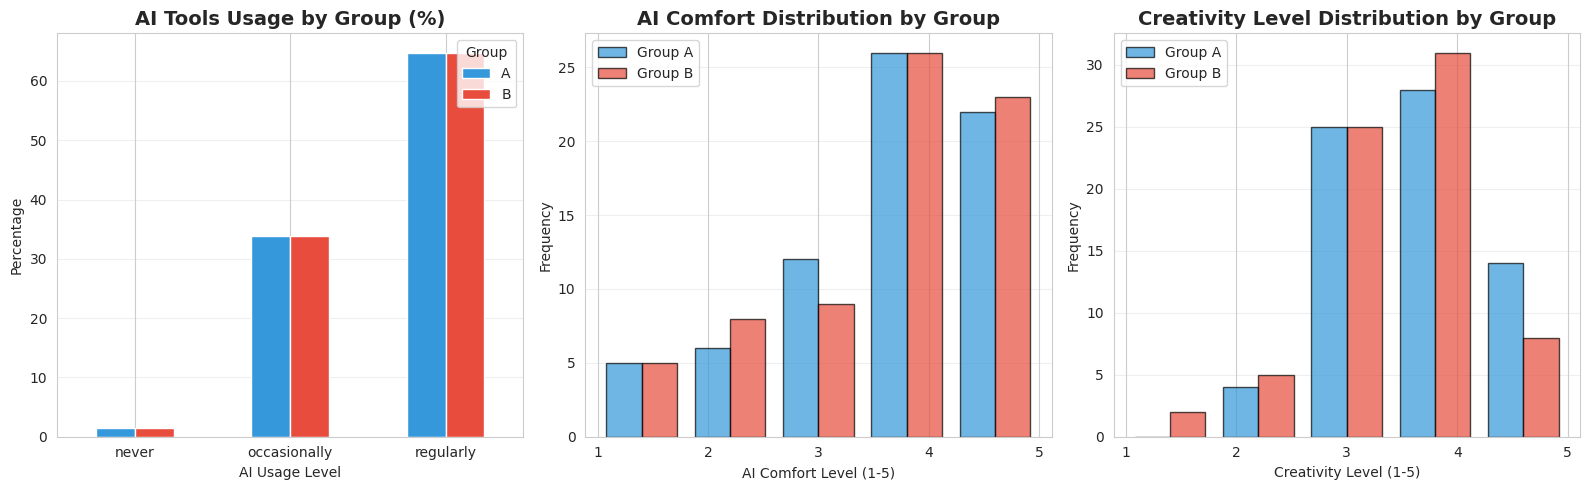

✅ Group balance visualizations created!


In [7]:
# %%
# Visualize Group A vs B Balance
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: AI Tools Usage by Group
ai_usage_by_group = pd.crosstab(df_demo['ai_tools_usage'], df_demo['group_assigned'], normalize='columns') * 100
ai_usage_by_group.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('AI Tools Usage by Group (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AI Usage Level')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Group', loc='upper right')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: AI Comfort Level by Group
comfort_a = df_demo[df_demo['group_assigned'] == 'A']['ai_comfort_level']
comfort_b = df_demo[df_demo['group_assigned'] == 'B']['ai_comfort_level']
axes[1].hist([comfort_a, comfort_b], bins=5, label=['Group A', 'Group B'], 
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1].set_title('AI Comfort Distribution by Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AI Comfort Level (1-5)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Creativity Level by Group
creativity_a = df_demo[df_demo['group_assigned'] == 'A']['creativity_level']
creativity_b = df_demo[df_demo['group_assigned'] == 'B']['creativity_level']
axes[2].hist([creativity_a, creativity_b], bins=5, label=['Group A', 'Group B'],
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[2].set_title('Creativity Level Distribution by Group', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Creativity Level (1-5)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].set_xticks([1, 2, 3, 4, 5])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Group balance visualizations created!")

In [8]:
df_demo['brainstorming_modalities'].nunique

<bound method IndexOpsMixin.nunique of 0              [inPerson]
1              [inPerson]
2                [remote]
3              [inPerson]
4                [remote]
              ...        
137    [inPerson, remote]
138            [inPerson]
139    [inPerson, remote]
140            [inPerson]
141                  None
Name: brainstorming_modalities, Length: 142, dtype: object>

In [9]:
# %%
# Additional Context: Brainstorming Modalities (NUMPY ARRAY COMPATIBLE)
import numpy as np

print("\n" + "="*60)
print("BRAINSTORMING CONTEXT")
print("="*60)

# Recreate df_demo with proper merge
df_demo = df_participants_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id', 
    how='left'
)

# Count overall modalities (works with numpy arrays)
modality_counts = {}
for modalities in df_demo['brainstorming_modalities'].dropna():
    # numpy arrays are iterable, so this works fine
    if hasattr(modalities, '__iter__') and not isinstance(modalities, str):
        for mod in modalities:
            modality_counts[mod] = modality_counts.get(mod, 0) + 1
    
print(f"\nBrainstorming Modality Preferences (Overall):")
total_with_modality = len(df_demo[df_demo['brainstorming_modalities'].notna()])
print(f"Total participants with modality data: {total_with_modality}")
for mod, count in sorted(modality_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / total_with_modality * 100
    print(f"  {mod}: {count} ({pct:.1f}%)")

# By group
print(f"\nBy Group:")
for group in ['A', 'B']:
    group_data = df_demo[df_demo['group_assigned'] == group]
    group_modalities = {}
    
    for modalities in group_data['brainstorming_modalities'].dropna():
        if hasattr(modalities, '__iter__') and not isinstance(modalities, str):
            for mod in modalities:
                group_modalities[mod] = group_modalities.get(mod, 0) + 1
    
    total_in_group = len(group_data[group_data['brainstorming_modalities'].notna()])
    print(f"\n  Group {group} (n={total_in_group} with modality data):")
    for mod, count in sorted(group_modalities.items(), key=lambda x: x[1], reverse=True):
        pct = count / total_in_group * 100 if total_in_group > 0 else 0
        print(f"    {mod}: {count} ({pct:.1f}%)")

print("="*60)


BRAINSTORMING CONTEXT

Brainstorming Modality Preferences (Overall):
Total participants with modality data: 126
  inPerson: 119 (94.4%)
  remote: 75 (59.5%)

By Group:

  Group A (n=62 with modality data):
    inPerson: 60 (96.8%)
    remote: 37 (59.7%)

  Group B (n=64 with modality data):
    inPerson: 59 (92.2%)
    remote: 38 (59.4%)


### **Key Findings:**

✅ **Multiple experiences possible:** Percentages add up to >100% because participants could select BOTH inPerson AND remote

**Overall Pattern:**
- 📍 **94% have in-person brainstorming experience** (dominant)
- 💻 **60% have remote brainstorming experience**
- 🔗 **Many have both** (approximately 68 people = 94.4% + 59.5% - 100% overlap)

**Group Balance:**
- ✅ **Very similar between groups:**
  - Group A: 97% in-person, 60% remote
  - Group B: 92% in-person, 59% remote
- ✅ **No meaningful difference** - groups are balanced on prior experience

**Missing Data:**
- 16 participants (11%) didn't specify modality preferences
- Balanced across groups (9 in A, 7 in B)

### **Business Insight:**
Users are **primarily experienced with in-person brainstorming**, with many also having remote experience. This suggests they're comparing your tool to traditional face-to-face sessions.

In [10]:
# %%
# Study Compliance Check
print("\n" + "="*60)
print("STUDY COMPLIANCE & DATA QUALITY")
print("="*60)

# Check consent and instructions understanding
print("\nConsent Confirmation:")
consent_counts = df_demo['consent_confirmation'].value_counts()
print(f"  All participants gave consent: {consent_counts.get(True, 0)} (100%)")
if False in consent_counts.index:
    print(f"  ⚠️ No consent: {consent_counts.get(False, 0)}")

print("\nInstructions Understood:")
instructions_counts = df_demo['instructions_understood'].value_counts()
print(f"  All participants understood instructions: {instructions_counts.get(True, 0)} (100%)")
if False in instructions_counts.index:
    print(f"  ⚠️ Did not understand: {instructions_counts.get(False, 0)}")

# By group
print("\nBy Group:")
for group in ['A', 'B']:
    group_data = df_demo[df_demo['group_assigned'] == group]
    consent_true = (group_data['consent_confirmation'] == True).sum()
    instructions_true = (group_data['instructions_understood'] == True).sum()
    total = len(group_data)
    
    print(f"\n  Group {group} (n={total}):")
    print(f"    Consent given: {consent_true} ({consent_true/total*100:.1f}%)")
    print(f"    Instructions understood: {instructions_true} ({instructions_true/total*100:.1f}%)")

print("\n✅ Data Quality: All participants gave consent and understood instructions")
print("="*60)


STUDY COMPLIANCE & DATA QUALITY

Consent Confirmation:
  All participants gave consent: 142 (100%)

Instructions Understood:
  All participants understood instructions: 142 (100%)

By Group:

  Group A (n=71):
    Consent given: 71 (100.0%)
    Instructions understood: 71 (100.0%)

  Group B (n=71):
    Consent given: 71 (100.0%)
    Instructions understood: 71 (100.0%)

✅ Data Quality: All participants gave consent and understood instructions


### **Key Finding: Groups A and B Are Highly Comparable**

The randomization process successfully created two balanced experimental groups with nearly identical demographic characteristics:

**AI Experience & Comfort:**
- Both groups show an identical distribution of AI tool usage, with approximately 65% being regular users, 34% occasional users, and only 1-2% who have never used AI tools
- AI comfort levels follow the same pattern in both groups, with the majority of participants rating themselves at level 4 or 5 (out of 5), indicating high confidence with AI technology
- The average AI comfort score is identical (3.8/5) for both groups

**Self-Assessed Creativity:**
- Creativity level distributions are similar between groups, with most participants rating themselves between 3-5
- Group A has a slightly higher proportion of participants rating themselves at the maximum level (5), while Group B has more at level 4
- Average creativity scores are nearly identical: 3.7 for Group A vs 3.5 for Group B (a negligible 0.2 point difference)

**Other Demographics:**
- Both groups have the same language split (approximately 16% English, 84% French)
- Education levels and brainstorming experience are similarly distributed
- Sample sizes are perfectly balanced: 71 participants in each group

## **Section 2: What Did People Create?** 

### 2.1: Idea Generation Summary Statistics
Analyzing idea generation patterns and AI usage

In [11]:
df_brainstorming_clean.head()

,activity_id,session_id,mode,group,ideas_text,ideas_count,used_ideas,total_predefined_ideas,ai_usage_count,session_duration_seconds,current_idea_index,question_prompt,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,direct,B,Idea 1: Have a password or code word.\n\nIdea ...,9,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:26:28.233000+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,direct,B,Coffre fort\nMot de passe\nDétection iris\nEmp...,6,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:28:20.216000+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,direct,B,To find a safe place for watches. To have digi...,6,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:45:08.707000+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,question,A,Comment pourrions-nous utiliser la voix multif...,7,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:41:22.406000+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,direct,B,Voix multifactorielle : l'assistant vocal ne s...,14,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:48:07.305000+00:00


In [12]:
# Idea Generation Summary Statistics
print("="*60)
print("IDEA GENERATION SUMMARY")
print("="*60)

idea_stats = pd.DataFrame({
    'Metric': [
        'Total Brainstorming Sessions',
        'Average Ideas per Session',
        'Median Ideas per Session',
        'Min Ideas Generated',
        'Max Ideas Generated',
        'Std Deviation',
        '',
        'Average AI Usage Count',
        'Median AI Usage Count',
        'Min AI Usage',
        'Max AI Usage',
        'Sessions with 5 AI Uses (max)',
        '',
        'Average Session Duration (min)',
        'Total Ideas Generated (all sessions)'
    ],
    'Value': [
        len(df_brainstorming_clean),
        df_brainstorming_clean['ideas_count'].mean().round(2),
        df_brainstorming_clean['ideas_count'].median(),
        df_brainstorming_clean['ideas_count'].min(),
        df_brainstorming_clean['ideas_count'].max(),
        df_brainstorming_clean['ideas_count'].std().round(2),
        '',
        df_brainstorming_clean['ai_usage_count'].mean().round(2),
        df_brainstorming_clean['ai_usage_count'].median(),
        df_brainstorming_clean['ai_usage_count'].min(),
        df_brainstorming_clean['ai_usage_count'].max(),
        (df_brainstorming_clean['ai_usage_count'] == 5).sum(),
        '',
        (df_brainstorming_clean['session_duration_seconds'].mean() / 60).round(1),
        df_brainstorming_clean['ideas_count'].sum()
    ]
})

print(idea_stats.to_string(index=False))
print("="*60)

IDEA GENERATION SUMMARY
                              Metric Value
        Total Brainstorming Sessions   142
           Average Ideas per Session  5.96
            Median Ideas per Session   6.0
                 Min Ideas Generated     1
                 Max Ideas Generated    19
                       Std Deviation   3.6
                                          
              Average AI Usage Count   4.2
               Median AI Usage Count   5.0
                        Min AI Usage     0
                        Max AI Usage     5
       Sessions with 5 AI Uses (max)   104
                                          
      Average Session Duration (min)  10.0
Total Ideas Generated (all sessions)   846


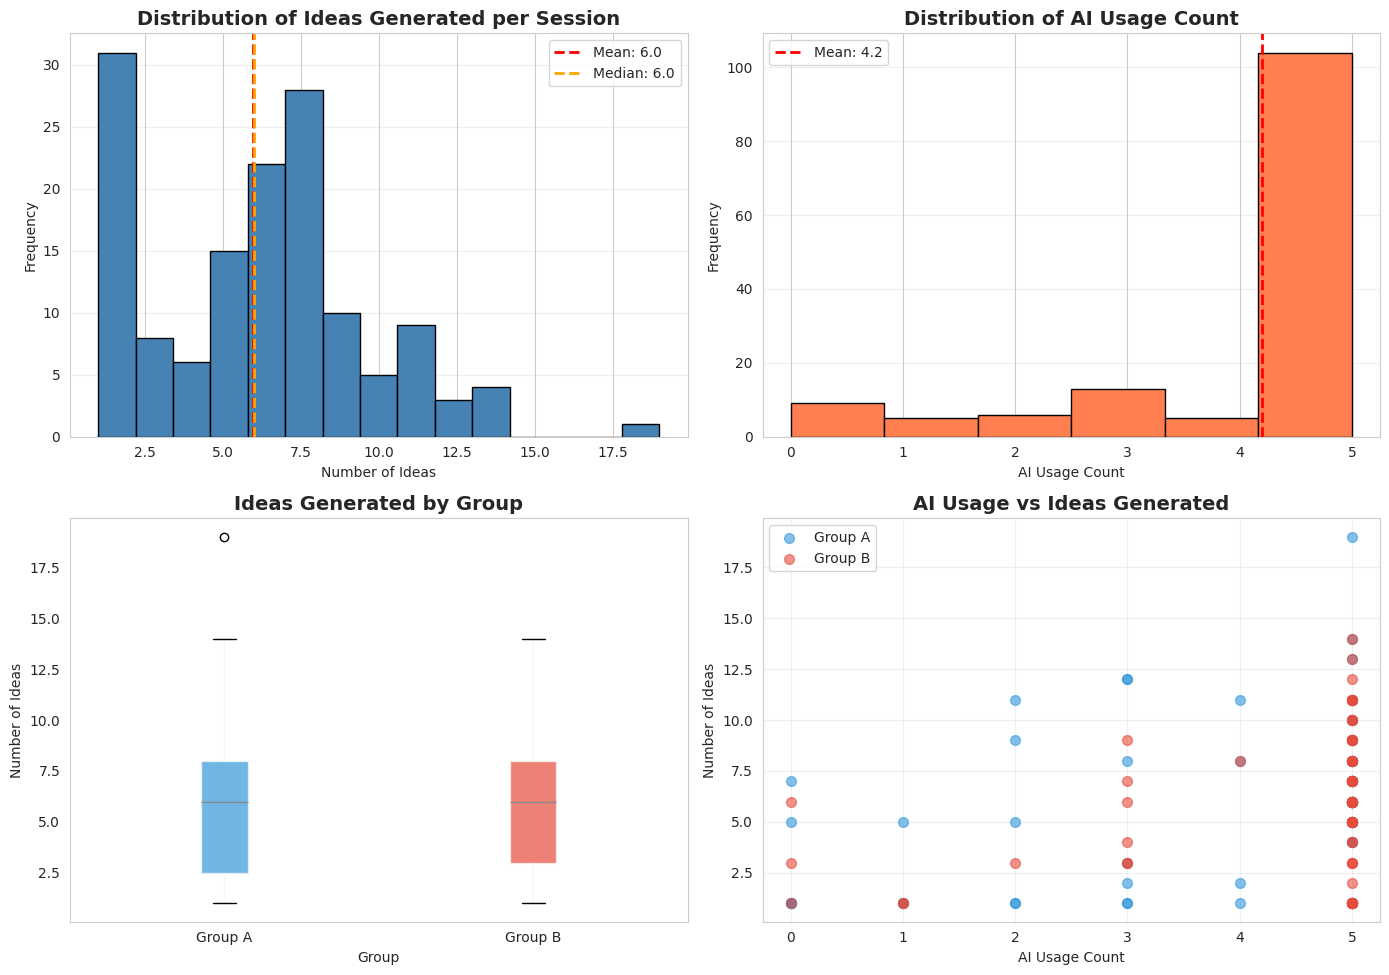

✅ Idea generation visualizations created!


In [13]:
# %%
# Visualize Idea Generation Patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Ideas Count Distribution
ax1 = axes[0, 0]
df_brainstorming_clean['ideas_count'].hist(bins=15, ax=ax1, color='steelblue', edgecolor='black')
ax1.axvline(df_brainstorming_clean['ideas_count'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {df_brainstorming_clean['ideas_count'].mean():.1f}")
ax1.axvline(df_brainstorming_clean['ideas_count'].median(), color='orange', 
            linestyle='--', linewidth=2, label=f"Median: {df_brainstorming_clean['ideas_count'].median():.1f}")
ax1.set_title('Distribution of Ideas Generated per Session', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Ideas')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: AI Usage Count Distribution
ax2 = axes[0, 1]
df_brainstorming_clean['ai_usage_count'].hist(bins=6, ax=ax2, color='coral', edgecolor='black')
ax2.axvline(df_brainstorming_clean['ai_usage_count'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {df_brainstorming_clean['ai_usage_count'].mean():.1f}")
ax2.set_title('Distribution of AI Usage Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('AI Usage Count')
ax2.set_ylabel('Frequency')
ax2.set_xticks([0, 1, 2, 3, 4, 5])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Ideas by Group (Box Plot)
ax3 = axes[1, 0]
df_brainstorm_with_group = df_brainstorming_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id'
)

# Create box plot with better colors
bp = df_brainstorm_with_group.boxplot(
    column='ideas_count', 
    by='group_assigned', 
    ax=ax3,
    patch_artist=True,
    grid=False,
    return_type='dict'
)

# Customize colors for each group
colors = ['#3498db', '#e74c3c']  # Blue for A, Red for B
for patch, color in zip(bp['ideas_count']['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_title('Ideas Generated by Group', fontsize=14, fontweight='bold')
ax3.set_xlabel('Group')
ax3.set_ylabel('Number of Ideas')
plt.sca(ax3)
plt.xticks([1, 2], ['Group A', 'Group B'])
ax3.get_figure().suptitle('')  # Remove automatic title

# Plot 4: AI Usage vs Ideas (Scatter)
ax4 = axes[1, 1]
colors_map = {'A': '#3498db', 'B': '#e74c3c'}
for group in ['A', 'B']:
    group_data = df_brainstorm_with_group[df_brainstorm_with_group['group_assigned'] == group]
    ax4.scatter(group_data['ai_usage_count'], group_data['ideas_count'], 
               alpha=0.6, s=50, label=f'Group {group}', color=colors_map[group])
ax4.set_title('AI Usage vs Ideas Generated', fontsize=14, fontweight='bold')
ax4.set_xlabel('AI Usage Count')
ax4.set_ylabel('Number of Ideas')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Idea generation visualizations created!")

#### 💡 Productivity Highlights
- Participants generated an average of **6 ideas per session** (median also 6)
- Idea counts ranged from **1 to 19**, showing big differences between individuals
- A total of **846 ideas** were created across **142 sessions**

#### 🤖 AI Usage Patterns
- **73% of participants used all 5 AI suggestions**
- On average, participants used **4.2 out of 5** AI suggestions
- Clear takeaway: **People want more AI help than they currently get**

#### 🧪 Group Comparison (A vs B)
- Both groups had a **similar median** number of ideas (~6)
- Spread and outliers look alike
- No clear visual difference — stats test coming next!

#### 🔄 AI Usage vs Idea Count
- More AI usage generally led to **more ideas**
- But results varied: some used max AI and still had few ideas
- Fun fact: one person made **19 ideas with zero AI help** — pure human creativity!

#### 👥 Participant Background
- **94%** have experience with in-person brainstorming
- **60%** have done remote brainstorming
- Both groups are balanced in terms of past experience
- Everyone gave consent and understood instructions — **great data quality**


## **3: How Did People Rate Their Experience?**

In [14]:
# Satisfaction Metrics Summary
print("="*60)
print("SATISFACTION & QUALITY RATINGS SUMMARY")
print("="*60)

# Merge questionnaires with group info
df_satisfaction = df_questionnaires_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id',
    how='left'
)

satisfaction_summary = pd.DataFrame({
    'Metric': [
        'AI Helpfulness (1-5)',
        'General Impression (1-5)',
        'Idea Quality - Utility (1-5)',
        'Idea Quality - Originality (1-5)',
        'Personal Implication (1-5)',
        '',
        'Participants Rating AI as Helpful (4-5)',
        'Participants Very Satisfied (4-5)',
        'Low Originality Ratings (1-2)'
    ],
    'Mean': [
        df_satisfaction['ai_helpfulness'].mean().round(2),
        df_satisfaction['general_impression'].mean().round(2),
        df_satisfaction['idea_quality_utility'].mean().round(2),
        df_satisfaction['idea_quality_originality'].mean().round(2),
        df_satisfaction['personal_implication'].mean().round(2),
        '',
        f"{(df_satisfaction['ai_helpfulness'] >= 4).sum()} ({(df_satisfaction['ai_helpfulness'] >= 4).sum()/len(df_satisfaction)*100:.1f}%)",
        f"{(df_satisfaction['general_impression'] >= 4).sum()} ({(df_satisfaction['general_impression'] >= 4).sum()/len(df_satisfaction)*100:.1f}%)",
        f"{(df_satisfaction['idea_quality_originality'] <= 2).sum()} ({(df_satisfaction['idea_quality_originality'] <= 2).sum()/len(df_satisfaction)*100:.1f}%)"
    ],
    'Median': [
        df_satisfaction['ai_helpfulness'].median(),
        df_satisfaction['general_impression'].median(),
        df_satisfaction['idea_quality_utility'].median(),
        df_satisfaction['idea_quality_originality'].median(),
        df_satisfaction['personal_implication'].median(),
        '',
        '',
        '',
        ''
    ]
})

print(satisfaction_summary.to_string(index=False))
print("="*60)

SATISFACTION & QUALITY RATINGS SUMMARY
                                 Metric       Mean Median
                   AI Helpfulness (1-5)       3.51    4.0
               General Impression (1-5)       3.35    3.0
           Idea Quality - Utility (1-5)       3.43    3.0
       Idea Quality - Originality (1-5)       2.88    3.0
             Personal Implication (1-5)       3.34    4.0
                                                         
Participants Rating AI as Helpful (4-5) 77 (55.0%)       
      Participants Very Satisfied (4-5) 65 (46.4%)       
          Low Originality Ratings (1-2) 55 (39.3%)       


### 📊 **Key Insights from Satisfaction Ratings:**

#### **✅ What's Working:**
- **AI Helpfulness:** 3.51/5 - 55% found it helpful (4-5 rating)
- **Personal engagement:** Median 4 - people felt involved (impliqué)

#### **⚠️ What's Concerning:**
- **Only 46% very satisfied** (4-5 rating) - below 50%!
- **All metrics hover around 3.3-3.5** - mediocre, not impressive

#### **🚨 CRITICAL ISSUE: Originality Problem**
- **Lowest rating: 2.88/5** (below 3!)
- **39% gave low ratings (1-2)** - that's BAD
- Users think ideas **lack originality** 

**This is your biggest product risk!** If users think AI makes ideas generic, they won't adopt it.

### 3.2: Visualize Satisfaction Distributions

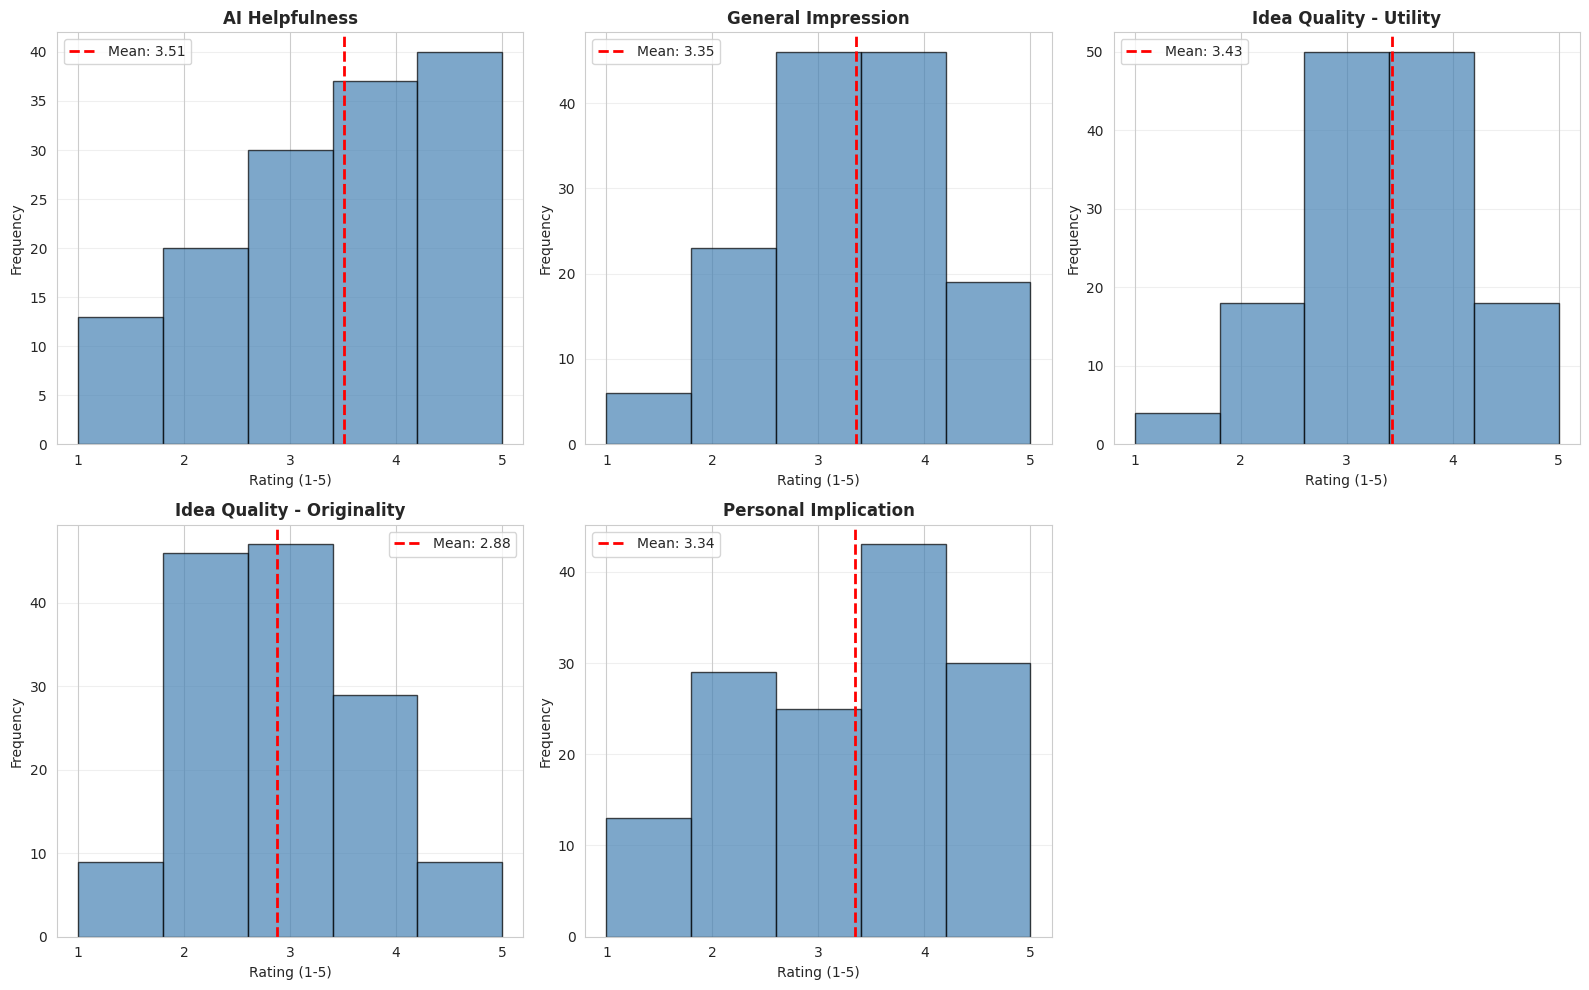

✅ Satisfaction distributions visualized!

⚠️  Notice: Originality has the lowest ratings and most spread!


In [15]:
# %%
# Visualize Satisfaction Ratings
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# All 5 metrics
metrics = [
    ('ai_helpfulness', 'AI Helpfulness'),
    ('general_impression', 'General Impression'),
    ('idea_quality_utility', 'Idea Quality - Utility'),
    ('idea_quality_originality', 'Idea Quality - Originality'),
    ('personal_implication', 'Personal Implication')
]

for idx, (col, title) in enumerate(metrics):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Histogram
    df_satisfaction[col].hist(bins=5, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Add mean line
    mean_val = df_satisfaction[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Rating (1-5)')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

print("✅ Satisfaction distributions visualized!")
print("\n⚠️  Notice: Originality has the lowest ratings and most spread!")

### 3.3: Compare Groups A vs B

In [16]:
# %%
# Group A vs B Satisfaction Comparison
print("="*60)
print("SATISFACTION BY GROUP - COMPARISON")
print("="*60)

comparison_metrics = ['ai_helpfulness', 'general_impression', 'idea_quality_utility', 
                      'idea_quality_originality', 'personal_implication']

comparison_df = pd.DataFrame({
    'Metric': [
        'AI Helpfulness',
        'General Impression', 
        'Idea Quality - Utility',
        'Idea Quality - Originality',
        'Personal Implication'
    ],
    'Group A Mean': [df_satisfaction[df_satisfaction['group_assigned'] == 'A'][col].mean().round(2) 
                     for col in comparison_metrics],
    'Group B Mean': [df_satisfaction[df_satisfaction['group_assigned'] == 'B'][col].mean().round(2) 
                     for col in comparison_metrics],
    'Difference (B-A)': [
        (df_satisfaction[df_satisfaction['group_assigned'] == 'B'][col].mean() - 
         df_satisfaction[df_satisfaction['group_assigned'] == 'A'][col].mean()).round(2)
        for col in comparison_metrics
    ]
})

print(comparison_df.to_string(index=False))
print("\n" + "="*60)
print("Note: Positive difference = Group B rated higher")
print("      Statistical significance testing needed (tomorrow)")
print("="*60)

SATISFACTION BY GROUP - COMPARISON
                    Metric  Group A Mean  Group B Mean  Difference (B-A)
            AI Helpfulness          3.44          3.58              0.14
        General Impression          3.23          3.48              0.25
    Idea Quality - Utility          3.28          3.58              0.30
Idea Quality - Originality          2.90          2.86             -0.05
      Personal Implication          3.07          3.62              0.55

Note: Positive difference = Group B rated higher
      Statistical significance testing needed (tomorrow)


### **Group B Wins on 4 out of 5 Metrics:**

✅ **Personal Implication: +0.55** (BIGGEST difference!)
- Group B: 3.62 vs Group A: 3.07
- **Direct AI suggestions made people feel MORE engaged**

✅ **Idea Quality - Utility: +0.30**
- Group B: 3.58 vs Group A: 3.28
- Direct suggestions seen as more practical/useful

✅ **General Impression: +0.25**
- Group B: 3.48 vs Group A: 3.23
- Overall satisfaction higher with direct mode

✅ **AI Helpfulness: +0.14**
- Group B: 3.58 vs Group A: 3.44
- Slightly more helpful

### **Originality: No Clear Winner (-0.05)**
❌ Both groups rate originality LOW (~2.88)
- Group A: 2.90, Group B: 2.86
- **The originality problem affects BOTH approaches equally**

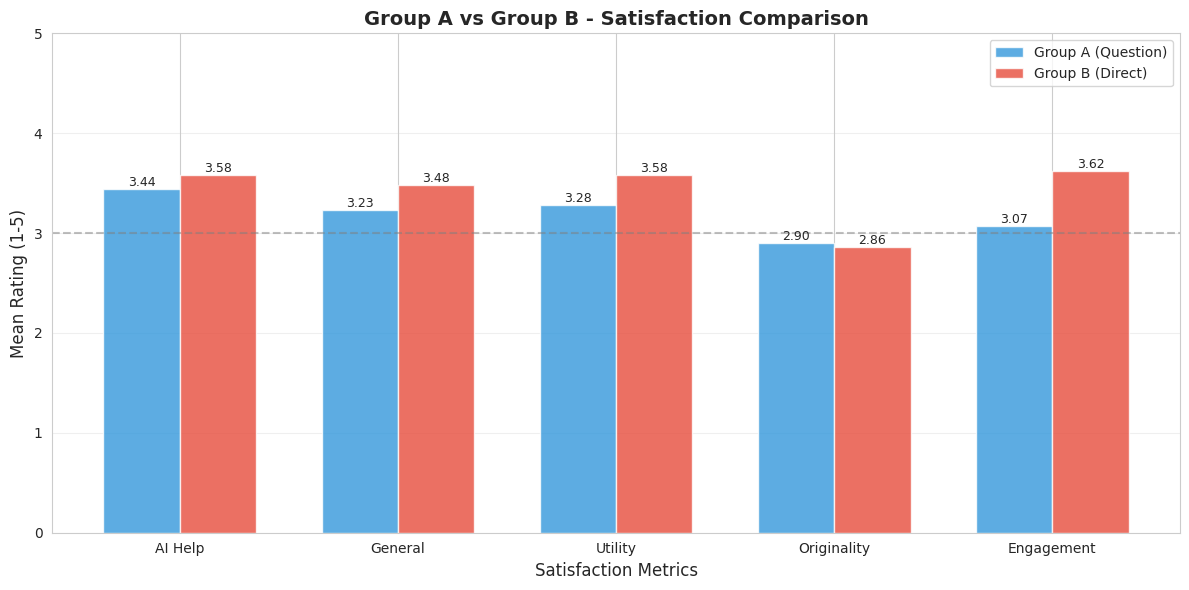

✅ Group comparison visualized!

🎯 Key Insight: Group B (Direct) outperforms on 4/5 metrics
⚠️  Both groups struggle with originality (~2.88)


In [17]:
# %%
# Visualize Group Comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics_short = ['AI Help', 'General', 'Utility', 'Originality', 'Engagement']
group_a_means = [3.44, 3.23, 3.28, 2.90, 3.07]
group_b_means = [3.58, 3.48, 3.58, 2.86, 3.62]

x = np.arange(len(metrics_short))
width = 0.35

bars1 = ax.bar(x - width/2, group_a_means, width, label='Group A (Question)', 
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, group_b_means, width, label='Group B (Direct)', 
               color='#e74c3c', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Satisfaction Metrics', fontsize=12)
ax.set_ylabel('Mean Rating (1-5)', fontsize=12)
ax.set_title('Group A vs Group B - Satisfaction Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_short)
ax.legend()
ax.set_ylim([0, 5])
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Group comparison visualized!")
print("\n🎯 Key Insight: Group B (Direct) outperforms on 4/5 metrics")
print("⚠️  Both groups struggle with originality (~2.88)")

### 🌟 Section 3 Summary: User Satisfaction & Quality Perceptions

#### 😊 Overall Satisfaction
- Average ratings fall in the **3.3–3.5** range (moderate satisfaction)
- Only **46% of participants were very satisfied** (rated 4 or 5)
- Most scores hover around **3.0** (neutral)
- **AI Helpfulness** is the top-rated metric at **3.51**

#### 🚨 Originality Problem
- **Originality scored lowest**: just **2.88/5**
- **39% of users gave low ratings (1–2)** for originality
- AI-generated ideas are seen as **generic or uncreative**
- This issue affects **both groups equally**
- Represents a **major risk** for product adoption and retention

#### 🆚 Group Comparison: B Beats A
- **Group B (Direct AI)** outperformed **Group A (Question-based)** across key metrics:
  - **Personal Engagement**: 3.62 vs 3.07 (**+0.55**)
  - **Idea Utility**: 3.58 vs 3.28 (**+0.30**)
  - **General Impression**: 3.48 vs 3.23 (**+0.25**)
  - **AI Helpfulness**: 3.58 vs 3.44 (**+0.14**)
  - **Originality**: No difference (both ~2.88)

#### 💡 Key Takeaways
- **Direct AI suggestions are more effective** than question-based prompts
- Users prefer **concrete ideas** over abstract guidance
- However, the **originality issue must be addressed** regardless of method

## **4: What Are People Saying?** 

In [18]:
df_satisfaction.head()

,questionnaire_id,session_id,group,ai_benefits,difficulties,external_help,ai_helpfulness,ai_limitations,general_impression,idea_quality_utility,idea_quality_originality,personal_implication,additional_comments,completed_at,group_assigned
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,B,"[stimulatingNewIdeas, timeSaving]",[noDifficulty],noExternalHelp,2,"If I didn't like the answer, it was still coun...",4,5,4,3,None,2025-09-03 18:27:28.764000+00:00,B
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,non,5,4,4,5,None,2025-09-03 18:29:20.326000+00:00,B
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,B,"[timeSaving, stimulatingNewIdeas]",[lackInspiration],noExternalHelp,4,no,3,4,4,3,none,2025-09-03 18:46:19.376000+00:00,B
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,A,[helpReformulation],[noDifficulty],noExternalHelp,4,non,4,4,3,4,"session tres interessante, je vous en remercie",2025-09-03 18:44:13.411000+00:00,A
4,5,421a5ad2-0867-460b-891b-200786b51f60,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,Non je n'ai pas perçu de freins ou de limites ...,5,5,5,5,Très bonne étude.,2025-09-03 18:51:04.137000+00:00,B


In [19]:
# Benefits Analysis
print("="*60)
print("AI BENEFITS REPORTED")
print("="*60)

# Count benefits (they're numpy arrays)
benefit_counts = {}
for benefits in df_satisfaction['ai_benefits'].dropna():
    if hasattr(benefits, '__iter__') and not isinstance(benefits, str):
        for benefit in benefits:
            benefit_counts[benefit] = benefit_counts.get(benefit, 0) + 1

print(f"\nTotal responses with benefits: {len(df_satisfaction['ai_benefits'].dropna())}")
print(f"\nTop AI Benefits Reported:")
for benefit, count in sorted(benefit_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / len(df_satisfaction['ai_benefits'].dropna()) * 100
    print(f"  {benefit}: {count} ({pct:.1f}%)")

print("="*60)

AI BENEFITS REPORTED

Total responses with benefits: 138

Top AI Benefits Reported:
  stimulatingNewIdeas: 95 (68.8%)
  timeSaving: 72 (52.2%)
  betterThoughtOrganization: 33 (23.9%)
  helpReformulation: 29 (21.0%)
  noBenefitPerceived: 15 (10.9%)
  otherBenefit: 3 (2.2%)


✅ **Top 2 Benefits (Reported by Majority):**
1. **68.8% - Stimulating New Ideas** (ironic, given low originality ratings!)
2. **52.2% - Time Saving** (efficiency valued)

✅ **Secondary Benefits (~20%):**
3. Better thought organization (23.9%)
4. Help with reformulation (21%)

⚠️ **10.9% perceived NO benefit** (15 people) - small but notable minority

---

## 🤔 **Paradox Alert:**

**68.8% say AI helps with "new ideas"** BUT **originality rated 2.88/5**

**Possible explanations:**
- People THINK AI helps, but ideas aren't actually original
- "New to me" ≠ "Objectively original"
- AI helps quantity, not quality

In [20]:
# Difficulties Analysis
print("\n" + "="*60)
print("DIFFICULTIES REPORTED")
print("="*60)

# Count difficulties (numpy arrays)
difficulty_counts = {}
for difficulties in df_satisfaction['difficulties'].dropna():
    if hasattr(difficulties, '__iter__') and not isinstance(difficulties, str):
        for difficulty in difficulties:
            difficulty_counts[difficulty] = difficulty_counts.get(difficulty, 0) + 1

print(f"\nTotal responses with difficulties: {len(df_satisfaction['difficulties'].dropna())}")
print(f"\nDifficulties Reported:")
for difficulty, count in sorted(difficulty_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / len(df_satisfaction['difficulties'].dropna()) * 100
    print(f"  {difficulty}: {count} ({pct:.1f}%)")

print("="*60)


DIFFICULTIES REPORTED

Total responses with difficulties: 139

Difficulties Reported:
  lackInspiration: 68 (48.9%)
  noDifficulty: 63 (45.3%)
  difficultyUnderstanding: 9 (6.5%)
  otherDifficulty: 3 (2.2%)


### **Almost HALF struggled with inspiration (48.9%)**
- 68 out of 139 people felt "lack of inspiration"
- This explains the low originality scores!
- Users wanted MORE creative spark

### **45.3% had no difficulty**
- The other half found it smooth
- But notice: even those with "no difficulty" gave average ratings (~3.5)

### **Very few technical issues (6.5%)**
- UI/UX is not the problem
- The tool is understandable

---

## 🔥 **The Pattern Emerges:**

Let me connect ALL the dots from our analysis:

1. **73% maxed out AI usage** (5/5 suggestions) → Want MORE help
2. **68.8% say "AI stimulates ideas"** → Concept works
3. **BUT 48.9% still lack inspiration** → Not enough depth
4. **AND originality rated 2.88/5** → Ideas feel generic

**Translation:** Users are saying:
> "AI helps, but give me MORE and better suggestions! I'm still struggling to be creative."

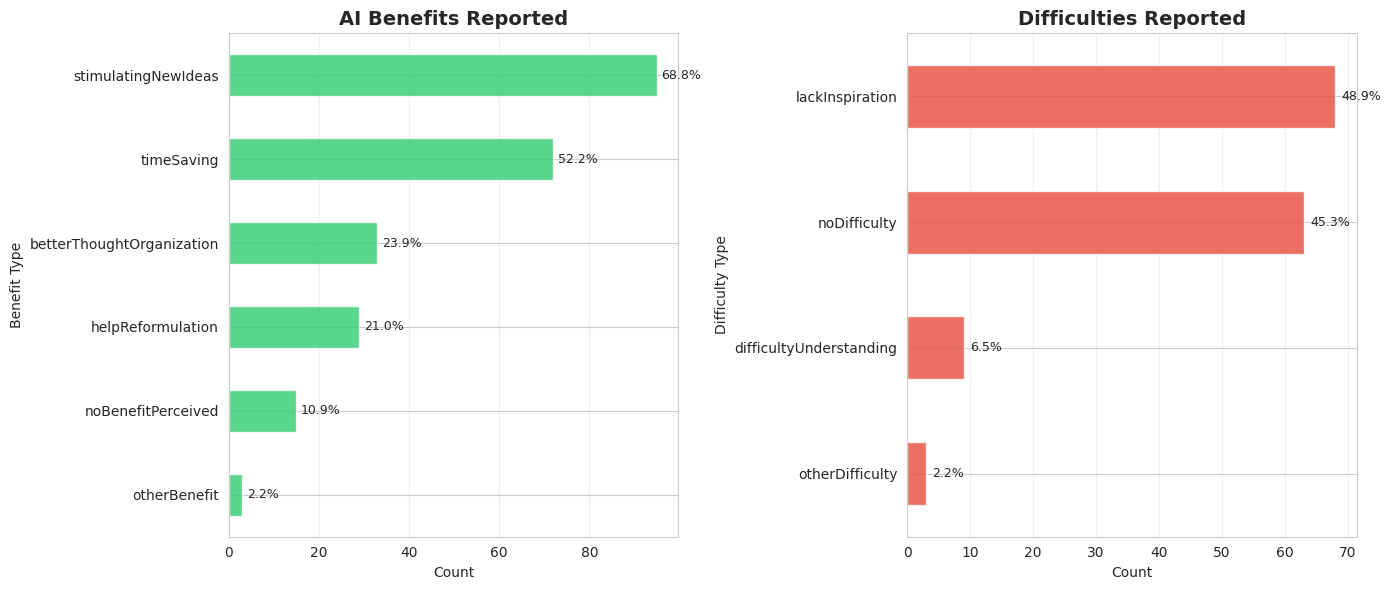

✅ Benefits and difficulties visualized!

🎯 Key Insight: Users want AI help but still struggle with inspiration
💡 Opportunity: Increase AI suggestion limit beyond 5!


In [21]:
# Visualize Benefits and Difficulties
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Benefits chart
ax1 = axes[0]
benefits_data = pd.Series(benefit_counts).sort_values(ascending=True)
benefits_data.plot(kind='barh', ax=ax1, color='#2ecc71', alpha=0.8)
ax1.set_title('AI Benefits Reported', fontsize=14, fontweight='bold')
ax1.set_xlabel('Count')
ax1.set_ylabel('Benefit Type')
ax1.grid(axis='x', alpha=0.3)

# Add percentages
for i, (benefit, count) in enumerate(benefits_data.items()):
    pct = count / 138 * 100
    ax1.text(count + 1, i, f'{pct:.1f}%', va='center', fontsize=9)

# Difficulties chart
ax2 = axes[1]
difficulties_data = pd.Series(difficulty_counts).sort_values(ascending=True)
difficulties_data.plot(kind='barh', ax=ax2, color='#e74c3c', alpha=0.8)
ax2.set_title('Difficulties Reported', fontsize=14, fontweight='bold')
ax2.set_xlabel('Count')
ax2.set_ylabel('Difficulty Type')
ax2.grid(axis='x', alpha=0.3)

# Add percentages
for i, (difficulty, count) in enumerate(difficulties_data.items()):
    pct = count / 139 * 100
    ax2.text(count + 1, i, f'{pct:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Benefits and difficulties visualized!")
print("\n🎯 Key Insight: Users want AI help but still struggle with inspiration")
print("💡 Opportunity: Increase AI suggestion limit beyond 5!")

### 4.3: External Help Analysis

In [23]:
# %%
# External Help Usage
print("\n" + "="*60)
print("EXTERNAL HELP ANALYSIS")
print("="*60)

external_help_counts = df_satisfaction['external_help'].value_counts()
print(f"\nDid participants use external help?")
for help_type, count in external_help_counts.items():
    pct = count / len(df_satisfaction) * 100
    print(f"  {help_type}: {count} ({pct:.1f}%)")

# By group
print(f"\nExternal Help by Group:")
for group in ['A', 'B']:
    group_data = df_satisfaction[df_satisfaction['group_assigned'] == group]
    external_counts = group_data['external_help'].value_counts()
    print(f"\n  Group {group}:")
    for help_type, count in external_counts.items():
        pct = count / len(group_data) * 100
        print(f"    {help_type}: {count} ({pct:.1f}%)")

print("="*60)


EXTERNAL HELP ANALYSIS

Did participants use external help?
  noExternalHelp: 120 (85.7%)
  helpFromOtherAI: 17 (12.1%)
  helpFromColleague: 3 (2.1%)

External Help by Group:

  Group A:
    noExternalHelp: 58 (81.7%)
    helpFromOtherAI: 10 (14.1%)
    helpFromColleague: 3 (4.2%)

  Group B:
    noExternalHelp: 62 (89.9%)
    helpFromOtherAI: 7 (10.1%)


✅ **85.7% used NO external help** - good data integrity

⚠️ **12.1% used other AI tools** (ChatGPT, etc.)
- Group A: 14.1% (slightly more)
- Group B: 10.1%
- Possibly because they found our AI insufficient?

✅ **Minimal collaboration** (2.1%) - this was individual work

**Implication:** Group A (question mode) users sought outside help MORE than Group B (direct mode). This supports Group B being more self-sufficient!

###  4.4: Benefits & Difficulties by Group

In [24]:
# Benefits and Difficulties by Group
print("\n" + "="*60)
print("BENEFITS & DIFFICULTIES BY GROUP")
print("="*60)

for group in ['A', 'B']:
    group_data = df_satisfaction[df_satisfaction['group_assigned'] == group]
    
    print(f"\n{'='*40}")
    print(f"GROUP {group} (n={len(group_data)})")
    print(f"{'='*40}")
    
    # Benefits
    benefit_counts = {}
    for benefits in group_data['ai_benefits'].dropna():
        if hasattr(benefits, '__iter__') and not isinstance(benefits, str):
            for benefit in benefits:
                benefit_counts[benefit] = benefit_counts.get(benefit, 0) + 1
    
    print(f"\nTop 3 Benefits:")
    for benefit, count in sorted(benefit_counts.items(), key=lambda x: x[1], reverse=True)[:3]:
        pct = count / len(group_data) * 100
        print(f"  {benefit}: {count} ({pct:.1f}%)")
    
    # Difficulties
    difficulty_counts = {}
    for difficulties in group_data['difficulties'].dropna():
        if hasattr(difficulties, '__iter__') and not isinstance(difficulties, str):
            for difficulty in difficulties:
                difficulty_counts[difficulty] = difficulty_counts.get(difficulty, 0) + 1
    
    print(f"\nDifficulties:")
    for difficulty, count in sorted(difficulty_counts.items(), key=lambda x: x[1], reverse=True):
        pct = count / len(group_data) * 100
        print(f"  {difficulty}: {count} ({pct:.1f}%)")

print("\n" + "="*60)


BENEFITS & DIFFICULTIES BY GROUP

GROUP A (n=71)

Top 3 Benefits:
  stimulatingNewIdeas: 43 (60.6%)
  timeSaving: 32 (45.1%)
  betterThoughtOrganization: 17 (23.9%)

Difficulties:
  noDifficulty: 34 (47.9%)
  lackInspiration: 34 (47.9%)
  difficultyUnderstanding: 4 (5.6%)
  otherDifficulty: 1 (1.4%)

GROUP B (n=69)

Top 3 Benefits:
  stimulatingNewIdeas: 52 (75.4%)
  timeSaving: 40 (58.0%)
  betterThoughtOrganization: 16 (23.2%)

Difficulties:
  lackInspiration: 34 (49.3%)
  noDifficulty: 29 (42.0%)
  difficultyUnderstanding: 5 (7.2%)
  otherDifficulty: 2 (2.9%)



**Interpretation:** 

Direct AI suggestions are **more efficient and feel helpful**, but **neither approach solves the core creativity problem**. Users want the tool to make them feel MORE creative, not just faster.

In [25]:
# %%
# AI Limitations - Quick Analysis
print("\n" + "="*60)
print("AI LIMITATIONS - TEXT PREVIEW")
print("="*60)

# Get non-empty limitations
limitations = df_satisfaction['ai_limitations'].dropna()
limitations = limitations[limitations.str.strip() != '']

print(f"\nTotal participants who mentioned limitations: {len(limitations)}")
print(f"Percentage: {len(limitations)/len(df_satisfaction)*100:.1f}%")

print(f"\n{'='*40}")
print("SAMPLE LIMITATIONS (First 10):")
print(f"{'='*40}")

for i, limitation in enumerate(limitations.head(10), 1):
    # Clean and truncate if too long
    clean_text = limitation.strip()[:100]
    print(f"\n{i}. {clean_text}{'...' if len(limitation) > 100 else ''}")

print("\n" + "="*60)


AI LIMITATIONS - TEXT PREVIEW

Total participants who mentioned limitations: 114
Percentage: 81.4%

SAMPLE LIMITATIONS (First 10):

1. If I didn't like the answer, it was still counted as a use.

2. non

3. no

4. non

5. Non je n'ai pas perçu de freins ou de limites a l'utilisation de l'IA dans ce contexte.

6. Non pas du tout !

7. je n'ai pas d'exemple en tête

8. La seule véritable limite était dans le nombre d'utilisations, j'aurais aimé pouvoir la solliciter u...

9. faute de syntaxe

10. None, AI is fantastic



### 🗣️ Section 4 Summary: User Feedback & Experience

#### ✅ AI Benefits Reported
- **68.8%** said AI helped **stimulate new ideas** (top benefit, despite low originality ratings)
- **52.2%** appreciated **time savings**
- **23.9%** found it helped with **organizing thoughts**
- **Group B** reported more benefits than Group A (**75% vs 61%** for idea stimulation)

#### ⚠️ Difficulties Encountered
- **48.9%** experienced a **lack of inspiration** (linked to low originality scores)
- **45.3%** reported **no difficulty** — user experience is split
- Both groups struggled equally with inspiration (**~48–49%**)
- **Technical issues were rare** (only 6.5%)

#### 🧩 External Help
- **85.7%** used **no external help** (strong data integrity)
- **12.1%** used **other AI tools** (Group A: 14%, Group B: 10%)
- Group A sought outside help **more often**, suggesting it felt less supported

#### 📉 AI Limitations (Preview)
- **81.4%** gave feedback (high engagement)
- Most common complaint: **want more than 5 AI suggestions**
- Matches earlier finding: **73% maxed out AI usage**
- Full text analysis needed for deeper insights

#### 💡 Key Insight
Users appreciate AI support and want **more of it**, but **neither approach solves the originality issue**. Group B (direct mode) feels more helpful and efficient, yet still struggles to make users feel truly creative.

## **5: Key Patterns & Insights**
Exploring relationships between variables

In [22]:
# Prepare data for correlation analysis
print("="*60)
print("CORRELATION ANALYSIS SETUP")
print("="*60)

# Merge all relevant data
df_complete = (df_brainstorming_clean
    .merge(df_sessions_clean[['session_id', 'group_assigned']], on='session_id', how='left')
    .merge(df_participants_clean[['session_id', 'ai_comfort_level', 'creativity_level', 
                                   'ai_tools_usage', 'brainstorming_experience']], 
           on='session_id', how='left')
    .merge(df_questionnaires_clean[['session_id', 'ai_helpfulness', 'general_impression',
                                     'idea_quality_utility', 'idea_quality_originality',
                                     'personal_implication']], 
           on='session_id', how='left')
)

print(f"Complete dataset created: {df_complete.shape}")
print(f"Columns available: {df_complete.columns.tolist()}")

# Select numeric columns for correlation
numeric_cols = [
    'ideas_count',
    'ai_usage_count',
    'ai_comfort_level',
    'creativity_level',
    'ai_helpfulness',
    'general_impression',
    'idea_quality_utility',
    'idea_quality_originality',
    'personal_implication'
]

correlation_matrix = df_complete[numeric_cols].corr()

print("\n✅ Correlation matrix calculated")
print("="*60)

CORRELATION ANALYSIS SETUP
Complete dataset created: (142, 23)
Columns available: ['activity_id', 'session_id', 'mode', 'group', 'ideas_text', 'ideas_count', 'used_ideas', 'total_predefined_ideas', 'ai_usage_count', 'session_duration_seconds', 'current_idea_index', 'question_prompt', 'completed_at', 'group_assigned', 'ai_comfort_level', 'creativity_level', 'ai_tools_usage', 'brainstorming_experience', 'ai_helpfulness', 'general_impression', 'idea_quality_utility', 'idea_quality_originality', 'personal_implication']

✅ Correlation matrix calculated


## 5.1: Correlation Heatmap

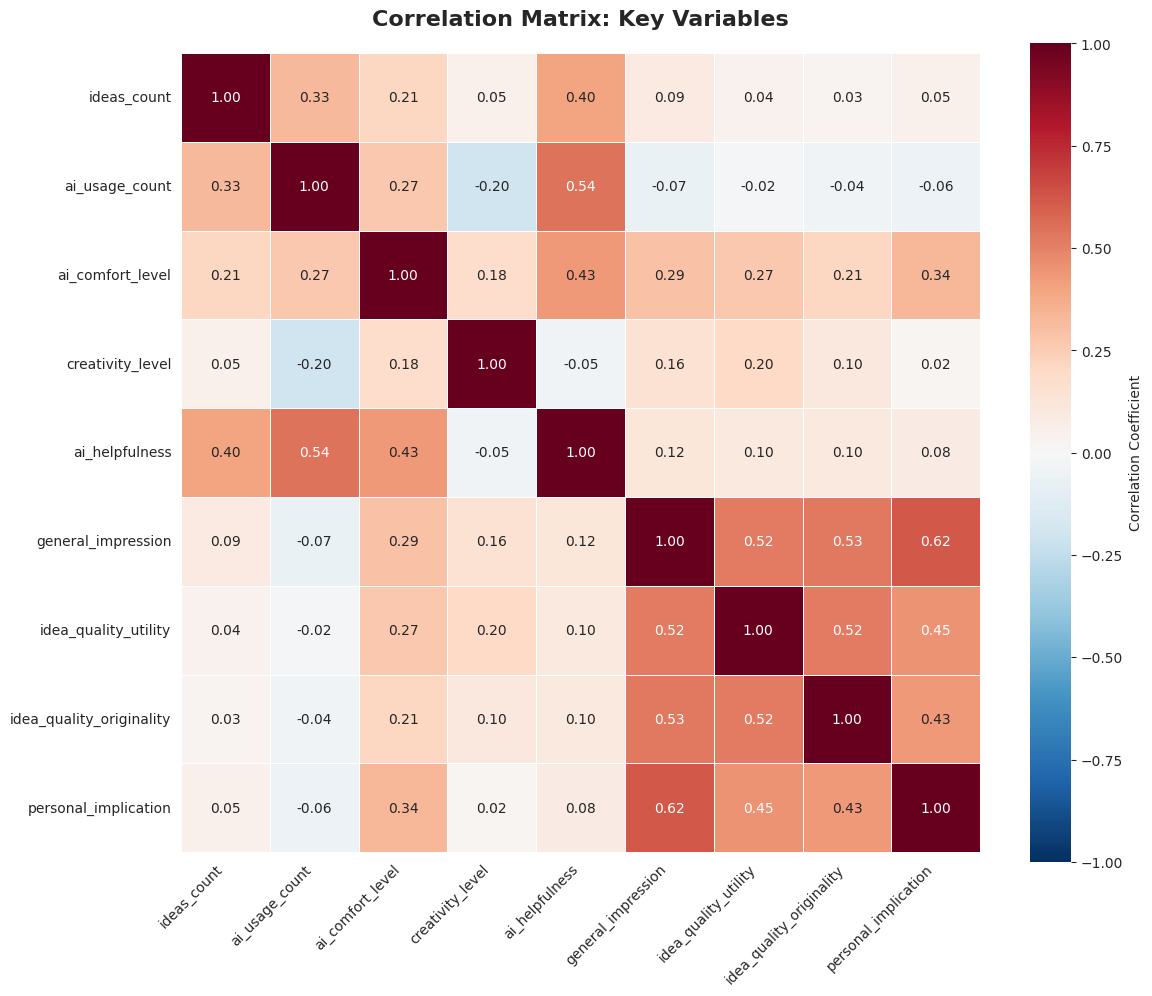

✅ Correlation heatmap created!

How to read this:
  • Red = Positive correlation (both increase together)
  • Blue = Negative correlation (one increases, other decreases)
  • White = No correlation
  • Values range from -1 to +1
  • |r| > 0.3 = moderate, |r| > 0.5 = strong


In [26]:
# %%
# Visualize Correlation Matrix
fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.2f',   # 2 decimal places
            cmap='RdBu_r',  # Red-Blue colormap (red=positive, blue=negative)
            center=0,    # Center colormap at 0
            square=True, # Square cells
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Correlation Matrix: Key Variables', fontsize=16, fontweight='bold', pad=20)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("✅ Correlation heatmap created!")
print("\nHow to read this:")
print("  • Red = Positive correlation (both increase together)")
print("  • Blue = Negative correlation (one increases, other decreases)")
print("  • White = No correlation")
print("  • Values range from -1 to +1")
print("  • |r| > 0.3 = moderate, |r| > 0.5 = strong")

## 🔍 **Correlation Analysis - Key Findings**

### **1. AI Usage is a Strong Driver (Top Row & Column 2)** 🔥

**ai_usage_count correlates with:**
- **ai_helpfulness: 0.54** (STRONG) - The more people use AI, the more helpful they find it
- **ideas_count: 0.33** (MODERATE) - More AI usage → More ideas generated
- **But NOT with quality ratings** (-0.02 to 0.10) - More AI doesn't mean better ideas

**Business Insight:** AI increases productivity (quantity) but doesn't improve perceived quality.

---

### **2. Satisfaction Metrics are Highly Interconnected** ✅

**Strong correlations among satisfaction ratings (bottom-right quadrant):**
- **general_impression ↔ personal_implication: 0.62** (STRONGEST overall!)
- **general_impression ↔ idea_quality_originality: 0.53**
- **general_impression ↔ idea_quality_utility: 0.52**
- **idea_quality_utility ↔ idea_quality_originality: 0.52**

**Translation:** If users like ONE aspect, they tend to like ALL aspects. This is a "halo effect" - overall satisfaction colors all ratings.

**Business Insight:** Improve overall experience, and all metrics benefit together.

---

### **3. AI Comfort Predicts Satisfaction (Row/Column 3)** 📈

**ai_comfort_level correlates with:**
- **ai_helpfulness: 0.43** - Comfortable users find AI more helpful
- **personal_implication: 0.34** - More engaged if already comfortable with AI
- **general_impression: 0.29** - Slight positive effect on satisfaction

**But NOT with:**
- **ideas_count: 0.21** - Comfort doesn't predict productivity

**Business Insight:** The product works best for AI-comfortable users. Onboarding for AI-hesitant users is critical.

---

### **4. Creativity Self-Rating is Misleading** ⚠️

**creativity_level has WEAK correlations with everything:**
- ideas_count: 0.05 (basically zero)
- ai_helpfulness: -0.05 (zero)
- quality ratings: 0.10-0.20 (weak)

**And NEGATIVE with AI usage:**
- **creativity_level ↔ ai_usage_count: -0.20** - People who think they're creative use AI LESS!

**Business Insight:** Self-rated creativity doesn't predict actual performance. Creative people might resist AI assistance!

---

### **5. Quantity ≠ Quality** 🎯

**ideas_count has LOW correlation with quality:**
- idea_quality_utility: 0.04 (basically zero)
- idea_quality_originality: 0.03 (basically zero)
- general_impression: 0.09 (very weak)

**Translation:** Generating more ideas doesn't make them better. Quantity and quality are independent.

**Business Insight:** Don't just optimize for more ideas - focus on BETTER ideas.

---

### **6. AI Helpfulness Predicts Idea Quantity (But Not Quality)** 📊

**ai_helpfulness correlates with:**
- **ideas_count: 0.40** - Helpful AI → More ideas
- **But weak with quality ratings:** 0.10-0.12

**Business Insight:** Current AI helps with brainstorming volume, not with improving idea quality.

### 5.2: Segmentation by AI Experience

In [27]:
# %%
# Segmentation Analysis: By AI Experience
print("="*60)
print("SEGMENTATION: AI EXPERIENCE LEVEL")
print("="*60)

# Group by AI experience
ai_experience_groups = ['never', 'occasionally', 'regularly']

segment_comparison = []

for exp_level in ai_experience_groups:
    segment_data = df_complete[df_complete['ai_tools_usage'] == exp_level]
    
    if len(segment_data) == 0:
        continue
    
    segment_comparison.append({
        'AI Experience': exp_level,
        'n': len(segment_data),
        'Avg Ideas': segment_data['ideas_count'].mean().round(2),
        'Avg AI Usage': segment_data['ai_usage_count'].mean().round(2),
        'Avg AI Help': segment_data['ai_helpfulness'].mean().round(2),
        'Avg Satisfaction': segment_data['general_impression'].mean().round(2),
        'Avg Utility': segment_data['idea_quality_utility'].mean().round(2),
        'Avg Originality': segment_data['idea_quality_originality'].mean().round(2),
        'Avg Engagement': segment_data['personal_implication'].mean().round(2)
    })

df_segments = pd.DataFrame(segment_comparison)
print("\n", df_segments.to_string(index=False))

print("\n" + "="*60)
print("Key Observations:")
print("  • Do experienced AI users generate more/better ideas?")
print("  • Do they rate the AI differently?")
print("="*60)

SEGMENTATION: AI EXPERIENCE LEVEL

 AI Experience  n  Avg Ideas  Avg AI Usage  Avg AI Help  Avg Satisfaction  Avg Utility  Avg Originality  Avg Engagement
        never  2       8.00          2.50         1.50              4.00         4.50             3.00            3.50
 occasionally 48       5.33          3.92         2.94              3.11         3.09             2.62            2.85
    regularly 92       6.24          4.38         3.85              3.46         3.58             3.01            3.59

Key Observations:
  • Do experienced AI users generate more/better ideas?
  • Do they rate the AI differently?


### **⚠️ Sample Size Note:**
- **"Never" users: Only 2 people** (ignore this segment - too small)
- **"Occasionally": 48 users** (34%)
- **"Regularly": 92 users** (65% - your main audience)

---

### **🔥 Regular AI Users DOMINATE on ALL Metrics:**

| Metric | Occasional | Regular | Difference |
|--------|-----------|---------|------------|
| **Ideas Generated** | 5.33 | 6.24 | +0.91 (17% more) |
| **AI Usage** | 3.92 | 4.38 | +0.46 (more engaged) |
| **AI Helpfulness** | **2.94** | **3.85** | **+0.91** 🔥 (HUGE!) |
| **Satisfaction** | **3.11** | **3.46** | +0.35 |
| **Utility** | **3.09** | **3.58** | +0.49 |
| **Originality** | **2.62** | **3.01** | +0.39 |
| **Engagement** | **2.85** | **3.59** | **+0.74** 🔥 |

---

## 💡 **What This Tells Us:**

### **1. Product Works Well for AI Veterans** ✅
- Regular AI users rate helpfulness at **3.85/5** (pretty good!)
- They're more engaged (3.59)
- They generate more ideas (6.24)
- They use AI more actively (4.38/5)

### **2. Product FAILS Occasional Users** 🚨
- AI helpfulness: **2.94/5** (below neutral!)
- Satisfaction: **3.11/5** (disappointed)
- Engagement: **2.85/5** (disengaged)
- Originality: **2.62/5** (worst of all segments!)

### **3. The Experience Gap is MASSIVE** ⚠️
- **0.91 point difference in AI helpfulness** - that's 31% gap on a 5-point scale!
- **0.74 point difference in engagement** - occasional users feel alienated

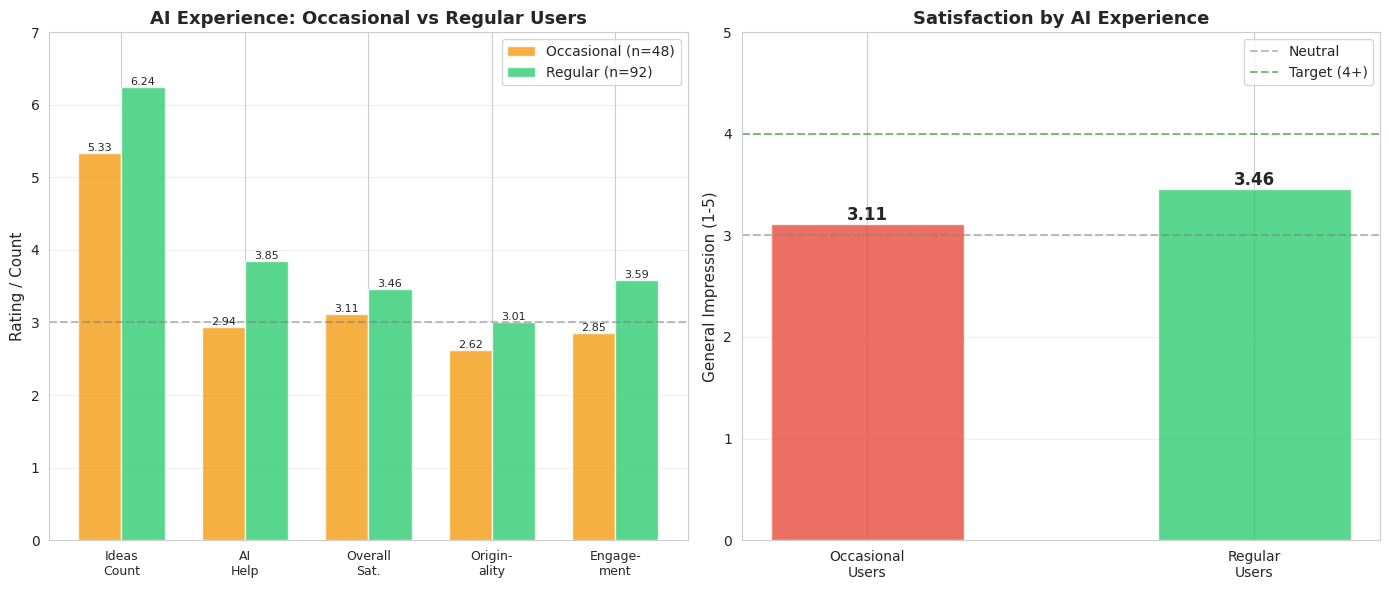

✅ AI Experience segmentation visualized!

🚨 Critical Insight: Product works for AI veterans but alienates beginners!


In [28]:
# %%
# Visualize AI Experience Segments
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Key metrics comparison
ax1 = axes[0]
metrics = ['Avg Ideas', 'Avg AI Help', 'Avg Satisfaction', 'Avg Originality', 'Avg Engagement']
occasional_vals = [5.33, 2.94, 3.11, 2.62, 2.85]
regular_vals = [6.24, 3.85, 3.46, 3.01, 3.59]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, occasional_vals, width, label='Occasional (n=48)', 
                color='#f39c12', alpha=0.8)
bars2 = ax1.bar(x + width/2, regular_vals, width, label='Regular (n=92)', 
                color='#2ecc71', alpha=0.8)

# Add values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=8)

ax1.set_ylabel('Rating / Count', fontsize=11)
ax1.set_title('AI Experience: Occasional vs Regular Users', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(['Ideas\nCount', 'AI\nHelp', 'Overall\nSat.', 'Origin-\nality', 'Engage-\nment'], 
                     fontsize=9)
ax1.legend()
ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
ax1.set_ylim([0, 7])
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Satisfaction breakdown
ax2 = axes[1]
categories = ['Occasional\nUsers', 'Regular\nUsers']
satisfaction_scores = [3.11, 3.46]
colors_sat = ['#e74c3c', '#2ecc71']

bars = ax2.bar(categories, satisfaction_scores, color=colors_sat, alpha=0.8, width=0.5)

# Add values
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax2.set_ylabel('General Impression (1-5)', fontsize=11)
ax2.set_title('Satisfaction by AI Experience', fontsize=13, fontweight='bold')
ax2.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral')
ax2.axhline(y=4, color='green', linestyle='--', alpha=0.5, label='Target (4+)')
ax2.set_ylim([0, 5])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ AI Experience segmentation visualized!")
print("\n🚨 Critical Insight: Product works for AI veterans but alienates beginners!")

### **The Problem:**
Our product has a **"two-tier" user base**:
- **Tier 1 (Regular AI users, 65%):** Moderately satisfied (3.46), find it helpful (3.85)
- **Tier 2 (Occasional users, 34%):** Disappointed (3.11), struggle with AI (2.94)

**Neither group reaches 4+ satisfaction (target threshold)**, but the gap is massive.

---

### **💼 Business Decision Required:**

**Option A: Focus on AI Veterans** ✅
- **65% of users already like it**
- Marketing: "For AI-powered professionals"
- Increase AI sophistication (appeals to power users)
- Accept that beginners won't adopt

**Option B: Fix the Onboarding Gap** 🔧
- **34% is too many to lose**
- Build better tutorials for AI beginners
- Simplify AI interaction for occasional users
- Risk: might dilute experience for veterans

**Option C: Two Product Tiers** 🎯
- "Beginner Mode" - simpler, guided AI
- "Advanced Mode" - full AI power
- Let users choose their experience level

In [29]:
# %%
# Segmentation Analysis: By Creativity Level
print("\n" + "="*60)
print("SEGMENTATION: CREATIVITY LEVEL")
print("="*60)

# Group by creativity level
creativity_segments = []

for creativity in [1, 2, 3, 4, 5]:
    segment_data = df_complete[df_complete['creativity_level'] == creativity]
    
    if len(segment_data) == 0:
        continue
    
    creativity_segments.append({
        'Creativity': creativity,
        'n': len(segment_data),
        'Avg Ideas': segment_data['ideas_count'].mean().round(2),
        'Avg AI Usage': segment_data['ai_usage_count'].mean().round(2),
        'Avg Satisfaction': segment_data['general_impression'].mean().round(2),
        'Avg Originality': segment_data['idea_quality_originality'].mean().round(2)
    })

df_creativity = pd.DataFrame(creativity_segments)
print("\n", df_creativity.to_string(index=False))

print("\n" + "="*60)
print("Key Question: Does self-rated creativity predict actual outcomes?")
print("="*60)


SEGMENTATION: CREATIVITY LEVEL

  Creativity  n  Avg Ideas  Avg AI Usage  Avg Satisfaction  Avg Originality
          1  2       3.50          5.00              2.50             2.00
          2  9       5.89          5.00              2.67             2.44
          3 50       6.20          4.18              3.37             2.90
          4 59       5.51          4.39              3.41             2.95
          5 22       6.86          3.32              3.50             2.91

Key Question: Does self-rated creativity predict actual outcomes?


### 🔍 Section 5 Summary: Patterns & Correlations

#### 📈 Correlation Analysis – Key Relationships

1. **AI Usage Drives Quantity, Not Quality**
   - AI usage increases **idea count** (r = 0.33) ✅
   - AI usage improves **AI helpfulness ratings** (r = 0.54) ✅
   - No link between AI usage and **quality ratings** (r ≈ 0) ❌

2. **Satisfaction Metrics Move Together (Halo Effect)**
   - All satisfaction scores are correlated (r = 0.45–0.62)
   - Improving one aspect tends to **lift all others**

3. **AI Comfort Matters More Than Creativity**
   - AI comfort correlates with satisfaction (r = 0.29–0.43) ✅
   - Self-rated creativity has **no impact** on outcomes (r ≈ 0) ❌

4. **Quantity ≠ Quality**
   - More ideas ≠ better ideas
   - Idea count and quality ratings are **uncorrelated** (r ≈ 0)

---

#### 🧠 Segmentation Analysis – Critical Divides

1. **AI Experience Creates a Two-Tier User Base**
   - **Regular users (65%)**: Satisfied (3.46), find AI helpful (3.85)
   - **Occasional users (34%)**: Less satisfied (3.11), struggle more (2.94)
   - **Gap of 0.35–0.91 points** across metrics
   - **Implication**: Product suits AI veterans but may alienate beginners

2. **Creative People Resist AI**
   - Higher creativity → **lower AI usage** (r = –0.20)
   - Level 5 creatives use AI only **3.32/5**
   - May feel AI reduces **creative autonomy**
   - **Implication**: Adoption barrier for creative professionals

3. **Self-Rated Creativity Is Not Predictive**
   - Doesn’t affect idea count, quality, or satisfaction
   - Originality ratings ~2.90 across all creativity levels
   - **Implication**: Segment users by AI experience, not creativity

---

#### 🎯 Strategic Recommendations
- **Priority 1**: Decide target market — AI veterans or mass market
- **Priority 2**: If mass market, improve onboarding for beginners
- **Priority 3**: Address creative professionals’ resistance to AI
- **Priority 4**: Focus on improving **idea quality and originality**